<a href="https://colab.research.google.com/github/whsh99/algorithm/blob/main/matrix_chain_multiplication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

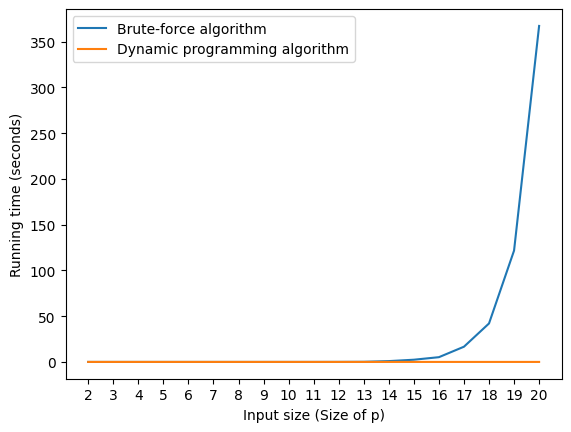

In [2]:
# Import the time module for timing the functions, and matplotlib.pyplot for plotting
import time
import matplotlib.pyplot as plt

# Define the brute force method for matrix chain multiplication
def bfMatrixChainMCL(p, i, j):
    if i == j:
        return 0
    min = float('inf')
    for k in range(i, j):
        count = (bfMatrixChainMCL(p, i, k) 
                + bfMatrixChainMCL(p, k+1, j) 
                + p[i-1]*p[k]*p[j])
        if count < min:
            min = count
    return min

# Define the dynamic programming method for matrix chain multiplication
def dpMatrixChainMCL(p):
    n = len(p)
    m = [[0 for x in range(n)] for x in range(n)]
    for l in range(2, n):
        for i in range(1, n-l+1):
            j = i + l - 1
            m[i][j] = float('inf')
            for k in range(i, j):
                q = m[i][k] + m[k+1][j] + p[i-1]*p[k]*p[j]
                if q < m[i][j]:
                    m[i][j] = q
    return m[1][n-1]

# The function to run the experiment and plot the results
def run_experiment():
    # Initialize empty lists to store the execution times of the brute force and dynamic programming algorithms
    bf_times = []
    dp_times = []

    # Initialize the size of the input (size of p)
    p_size = 2
    while True:
        # Generate a list p with values [1, 2, 3, ..., p_size+1]
        p = [i for i in range(1, p_size+2)]

        # Measure the execution time of the brute force algorithm
        start = time.time()
        bfMatrixChainMCL(p, 1, p_size)
        end = time.time()
        bf_time = end - start

        # Measure the execution time of the dynamic programming algorithm
        start = time.time()
        dpMatrixChainMCL(p)
        end = time.time()
        dp_time = end - start
        dp_times.append(dp_time)

        # Check if either of the times exceeded 5 minutes (300 seconds)
        if bf_time < 300:
            # Append the execution times to the respective lists
            bf_times.append(bf_time)
        else:
            # Append the execution time even if it exceeds 5 minutes to ensure matching list lengths
            bf_times.append(bf_time)
            break

        # Increment the input size
        p_size += 1

    # Plot the results
    plt.xticks(range(2, p_size+1), [str(x) for x in range(2, p_size+1)])
    plt.plot(list(range(2, p_size+1)), bf_times, label='Brute-force algorithm')
    plt.plot(list(range(2, p_size+1)), dp_times, label='Dynamic programming algorithm')
    plt.xlabel('Input size (Size of p)')
    plt.ylabel('Running time (seconds)')
    plt.legend()
    plt.show()

# Run the experiment with an upper limit of execution time of 5 minutes
run_experiment()